# Домашнее задание к лекции "Корреляция и корреляционный анализ"

## Обязательная часть

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('water.csv')

In [62]:
df.isna().sum()

Unnamed: 0    0
location      0
town          0
mortality     0
hardness      0
dtype: int64

пропусков в данных нет

In [63]:
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график\
Рассчитать коэффициенты корреляции Пирсона и Спирмена\
Построить модель линейной регрессии\
Рассчитать коэффициент детерминации\
Вывести график остатков

<AxesSubplot:title={'center':'Корреляция между уровнем смертности и кончентрацией кальция в воде'}, xlabel='hardness', ylabel='mortality'>

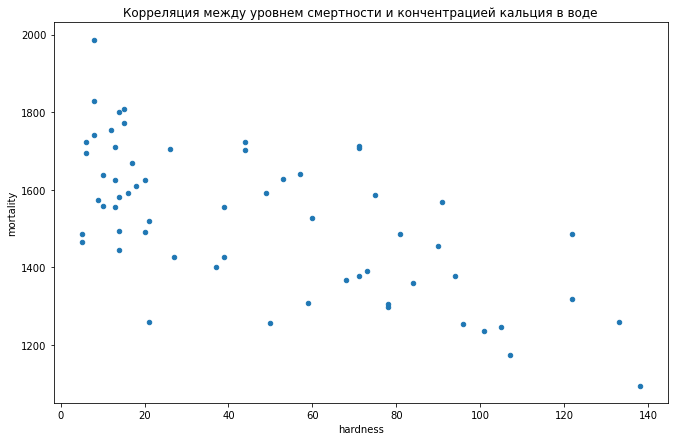

In [65]:
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality',
        title='Корреляция между уровнем смертности и кончентрацией кальция в воде')

In [66]:
# Коэффициент корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [67]:
# Коэффициент корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Средняя обратная взаимосвязь

Регрессия

In [68]:
X = df[['hardness']]
y = df['mortality']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [96]:
X_train.shape

(45, 1)

In [97]:
y_train.shape

(45,)

In [98]:
X_test.shape

(16, 1)

In [99]:
y_test.shape

(16,)

Выборка разделилась на 73,77% - тренеровочная выборка и 26,23% тестовая выборка

In [100]:
model = LinearRegression()

In [101]:
type(model)

sklearn.linear_model._base.LinearRegression

Обучаем модель на тернеровочных данных

In [102]:
model.fit(X_train, y_train)

LinearRegression()

In [103]:
model.coef_

array([-2.98766687])

In [104]:
model.intercept_

1669.3677442560102

уравнение линейной регрессии

y  = -2.98766687 * x + 1669.3677442560102

Делаем прогноз на основе тестовой выборки

In [108]:
y_pred = model.predict(X_test)
y_pred

array([1511.02140001, 1621.5650743 , 1624.55274117, 1639.49107553,
       1624.55274117, 1466.20639693, 1627.54040804, 1651.44174302,
       1609.61440681, 1639.49107553, 1591.68840557, 1627.54040804,
       1615.58974055, 1519.98440063, 1618.57740742, 1257.06971585])

In [109]:
y_test

57    1627
26    1591
28    1772
5     1558
6     1807
47    1369
32    1581
36    1724
15    1491
8     1637
30    1704
46    1495
4     1609
48    1257
1     1668
25    1096
Name: mortality, dtype: int64

Коэффициент детерминации

In [110]:
model.score(X_test, y_test)

0.5586868557072446

Сформируем таблицу остатков

In [111]:
out = X_test.merge(pd.DataFrame(y_test), how='left', left_index=True, right_index=True).reset_index().merge(pd.DataFrame(y_pred), how='left', left_index=True, right_index=True, suffixes=('', '_pred'))

In [112]:
out['resid'] = out['mortality'] - out[0]

In [113]:
out

,index,hardness,mortality,0,resid
0,57,53,1627,1511.021400,115.978600
1,26,16,1591,1621.565074,-30.565074
2,28,15,1772,1624.552741,147.447259
3,5,10,1558,1639.491076,-81.491076
4,6,15,1807,1624.552741,182.447259
5,47,68,1369,1466.206397,-97.206397
6,32,14,1581,1627.540408,-46.540408
7,36,6,1724,1651.441743,72.558257
8,15,20,1491,1609.614407,-118.614407
9,8,10,1637,1639.491076,-2.491076


остатки и положительные и отрицательные

<AxesSubplot:title={'center':'Распределение остатков'}, ylabel='Frequency'>

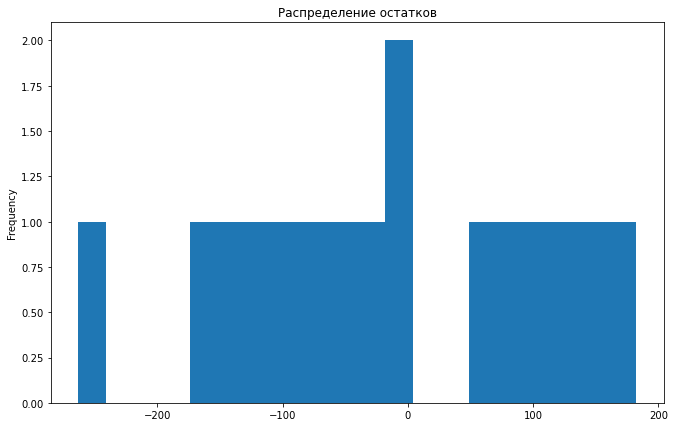

In [114]:
out['resid'].plot(kind='hist', 
                 title='Распределение остатков', 
                 bins=20)

Сложно сказать что-либо о распределении остатков. слишком маленькая тестовая выборка - всего 16 значений. Но есть равномерное распределение с пиком в районе 0

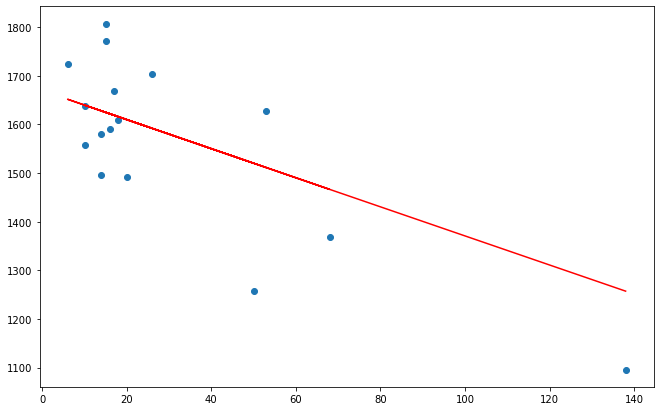

In [115]:
# точки -фактические значения, линия - прогнозные значения
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы\
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [116]:
df_south = df[ df['location'] == 'South']
df_north = df[ df['location'] == 'North']

In [117]:
len(df_south)

26

In [118]:
len(df_north)

35

Южные города

<AxesSubplot:title={'center':'Корреляция между уровнем смертности и кончентрацией кальция в воде (южные города)'}, xlabel='hardness', ylabel='mortality'>

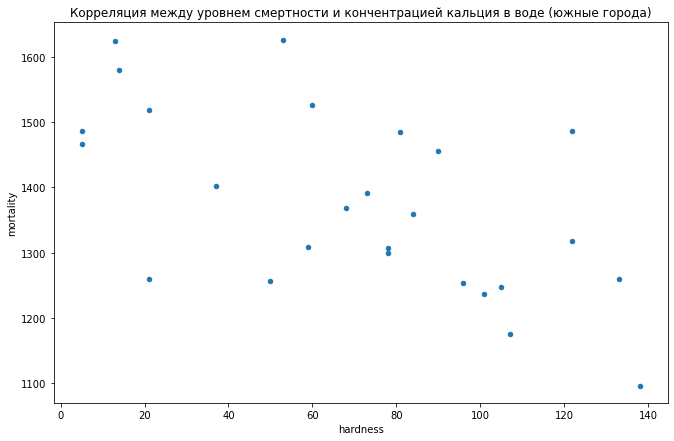

In [119]:
df_south.plot(kind='scatter', 
              x='hardness', 
              y='mortality', 
              title='Корреляция между уровнем смертности и кончентрацией кальция в воде (южные города)')

In [120]:
# Коэффициент корреляции Пирсона
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [121]:
# Коэффициент корреляции Спирмана
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Средняя обратная взаимосвязь

Регрессия

In [122]:
X = df_south[['hardness']]
y = df_south['mortality']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
model.coef_

array([-1.46614808])

In [125]:
model.intercept_

1455.574458831008

уравнение линейной регрессии

y  = -1.46614808 * x + 1455.574458831008

In [126]:
y_pred = model.predict(X_test)

In [127]:
model.score(X_test, y_test)

0.01918417908830894

Коэффициент детерминации существенно уменьшился, что говорит о некорректной модели

In [128]:
out = X_test.merge(pd.DataFrame(y_test), how='left', left_index=True, right_index=True).reset_index().merge(pd.DataFrame(y_pred), how='left', left_index=True, right_index=True, suffixes=('', '_pred'))
out['resid'] = out['mortality'] - out[0]
out

,index,hardness,mortality,0,resid
0,54,13,1625,1436.514534,188.485466
1,56,60,1527,1367.605574,159.394426
2,37,107,1175,1298.696614,-123.696614
3,12,21,1519,1424.785349,94.214651
4,10,73,1392,1348.545649,43.454351
5,27,37,1402,1401.326980,0.673020
6,57,53,1627,1377.868611,249.131389


<AxesSubplot:title={'center':'Распределение остатков'}, ylabel='Frequency'>

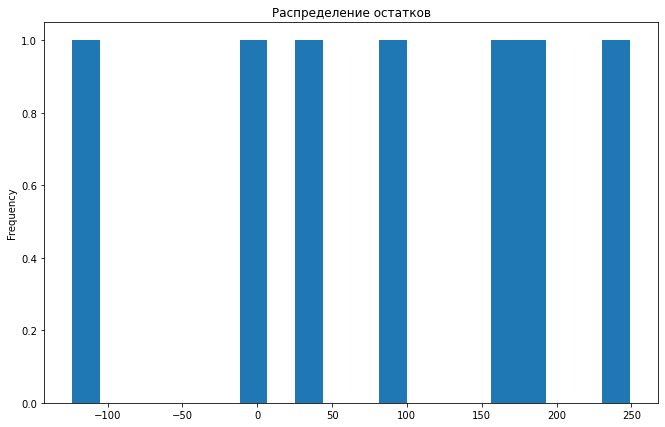

In [129]:
out['resid'].plot(kind='hist', 
                 title='Распределение остатков', 
                 bins=20)

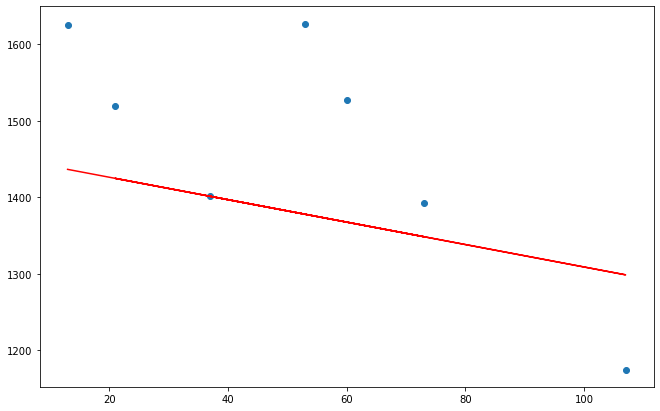

In [130]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

в тестовой выборке слишком мало значений

Северные города

<AxesSubplot:title={'center':'Корреляция между уровнем смертности и кончентрацией кальция в воде (южные города)'}, xlabel='hardness', ylabel='mortality'>

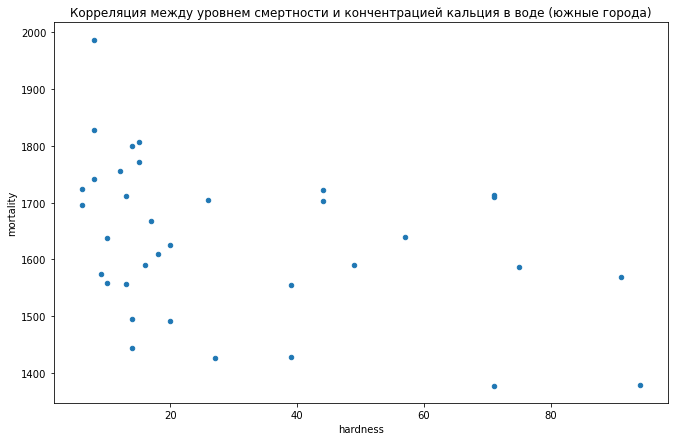

In [131]:
df_north.plot(kind='scatter', 
              x='hardness', 
              y='mortality', 
              title='Корреляция между уровнем смертности и кончентрацией кальция в воде (южные города)')

In [132]:
# Коэффициент корреляции Пирсона
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [133]:
# Коэффициент корреляции Спирмана
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Коэффициенты корреляции существенно снизились.

Регрессия

In [134]:
X = df_north[['hardness']]
y = df_north['mortality']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=33)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [136]:
model.coef_

array([-1.51709547])

In [137]:
model.intercept_

1665.1229887017312

уравнение линейной регрессии

y  = -1.51709547 * x + 1665.1229887017312

In [138]:
y_pred = model.predict(X_test)

In [139]:
model.score(X_test, y_test)

0.10815924819146805

Аналогично с южными городами

In [140]:
out = X_test.merge(pd.DataFrame(y_test), how='left', left_index=True, right_index=True).reset_index().merge(pd.DataFrame(y_pred), how='left', left_index=True, right_index=True, suffixes=('', '_pred'))
out['resid'] = out['mortality'] - out[0]
out

,index,hardness,mortality,0,resid
0,8,10,1637,1649.952034,-12.952034
1,52,57,1640,1578.648547,61.351453
2,60,71,1378,1557.409210,-179.409210
3,29,8,1828,1652.986225,175.013775
4,36,6,1724,1656.020416,67.979584
5,50,71,1713,1557.409210,155.590790
6,16,39,1555,1605.956265,-50.956265
7,6,15,1807,1642.366557,164.633443
8,28,15,1772,1642.366557,129.633443


<AxesSubplot:title={'center':'Распределение остатков'}, ylabel='Frequency'>

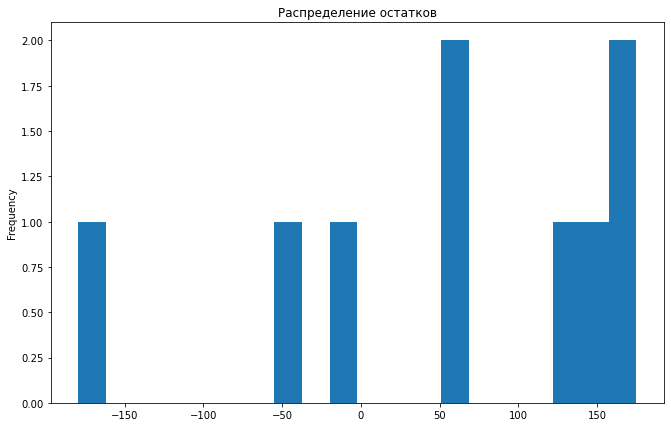

In [141]:
out['resid'].plot(kind='hist', 
                 title='Распределение остатков', 
                 bins=20)

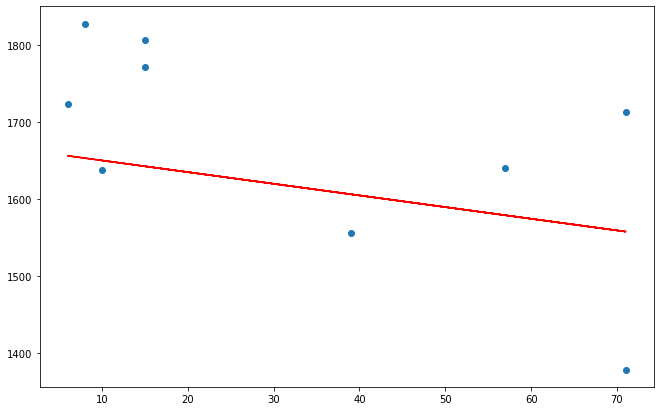

In [142]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

в тестовой выборке слишком мало значений